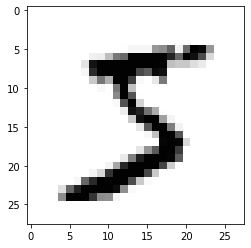

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
# Configuration options
feature_vector_length = 784

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Visualize one sample

plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')
num_classes=10

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# change the the type of the data set
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)


Feature shape: (784,)


In [ ]:
import tensorflow as tf
input = tf.keras.Input(shape=input_shape)
hidden1 = Dense(200, activation='relu')(input)
output = Dense(10, activation='softmax')(hidden1)

MLP1 = tf.keras.Model(input, output)
Hidden=tf.keras.Model(input,hidden1)

In [ ]:
MLP1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=MLP1.fit(X_train, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)


In [ ]:
Y_train.shape

(60000,)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


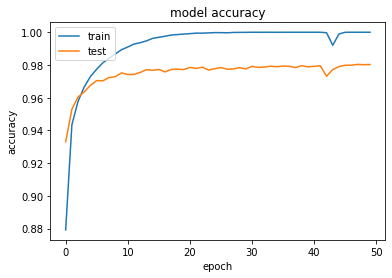

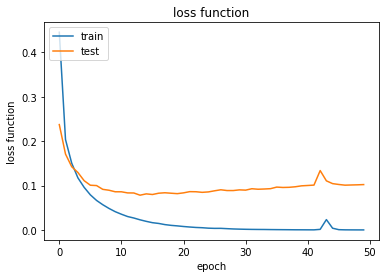

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
history.history['loss']

In [ ]:
Hid=Hidden(X_train).numpy()
Hid.shape

(60000, 200)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, svd_solver='full')
X=pca.fit_transform(Hid,)
X.shape

(60000, 77)

In [ ]:
auto_input = tf.keras.Input(shape=(200,))
encoder = Dense(77, activation='relu')(auto_input)
decoder = Dense(200, activation='linear')(encoder)

Autoencoder = tf.keras.Model(auto_input, decoder)
Encoder=tf.keras.Model(auto_input,encoder)

# Configure the model and start training
Autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse'])
history1= Autoencoder.fit(Hid, Hid, epochs=40, batch_size=500, verbose=1, validation_split=0.2)



dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


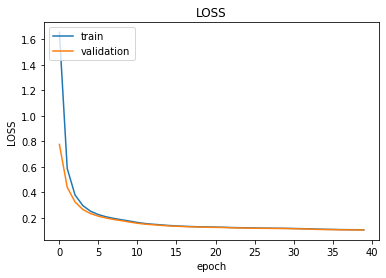

In [ ]:
print(history1.history.keys())
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('LOSS')
plt.ylabel('LOSS')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Newinput=Encoder(Hid).numpy()
print(Newinput.shape)

input2 = tf.keras.Input(shape=(77,))
hidden2 = Dense(50, activation='relu')(input2)
output2 = Dense(10, activation='softmax')(hidden2)

MLP2 = tf.keras.Model(input2, output2)

(60000, 77)


In [ ]:
Newinput.shape

(60000, 77)

In [ ]:
MLP2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history3=MLP2.fit(Newinput, Y_train, epochs=50, batch_size=250, verbose=1, validation_split=0.2)


Epoch 1/50
192/192 [==============================] - 1s 4ms/step - loss: 0.9396 - accuracy: 0.7365 - val_loss: 0.2782 - val_accuracy: 0.9293
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.1840 - accuracy: 0.9537 - val_loss: 0.1555 - val_accuracy: 0.9578
Epoch 3/50
192/192 [==============================] - 1s 3ms/step - loss: 0.1088 - accuracy: 0.9721 - val_loss: 0.1234 - val_accuracy: 0.9645
Epoch 4/50
192/192 [==============================] - 1s 3ms/step - loss: 0.0773 - accuracy: 0.9802 - val_loss: 0.1066 - val_accuracy: 0.9686
Epoch 5/50
192/192 [==============================] - 1s 3ms/step - loss: 0.0594 - accuracy: 0.9848 - val_loss: 0.0998 - val_accuracy: 0.9697
Epoch 6/50
192/192 [==============================] - 1s 3ms/step - loss: 0.0476 - accuracy: 0.9885 - val_loss: 0.0988 - val_accuracy: 0.9699
Epoch 7/50
192/192 [==============================] - 1s 3ms/step - loss: 0.0399 - accuracy: 0.9906 - val_loss: 0.0912 - val_accuracy: 0.9728
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


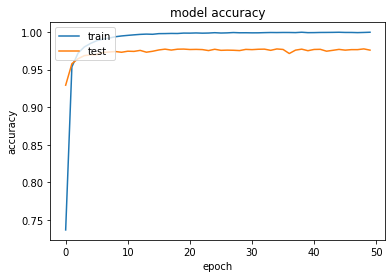

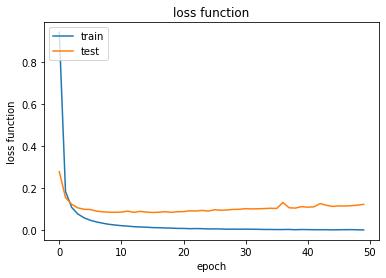

In [ ]:
print(history3.history.keys())
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
Newprediction=MLP2(Newinput).numpy()
print(Newprediction[0])
Prediction=np.argmax(Newprediction, axis=1)
Y_train=np.argmax(Y_train,axis=1)
tf.math.confusion_matrix(Prediction, Y_train)

[1.53414541e-26 5.29119024e-22 1.11356314e-20 1.36761577e-04
 0.00000000e+00 9.99863267e-01 3.22294176e-26 7.00905873e-26
 2.84371833e-24 3.88102210e-23]


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5910,    0,    4,    0,    0,    1,   11,    1,    6,    6],
       [   0, 6729,    3,    0,    6,    0,    0,    3,    2,    4],
       [   4,    1, 5926,    6,    0,    1,    1,    4,    2,    0],
       [   0,    2,    5, 6101,    0,   12,    0,    7,    9,    6],
       [   0,    1,    3,    0, 5823,    2,    6,    3,    1,   24],
       [   2,    0,    1,   13,    0, 5375,    2,    4,    5,    2],
       [   0,    4,    0,    1,    2,   19, 5896,    0,    2,    0],
       [   1,    1,    5,    3,    3,    0,    0, 6240,    3,    9],
       [   4,    4,   11,    5,    0,    5,    2,    2, 5815,    6],
       [   2,    0,    0,    2,    8,    6,    0,    1,    6, 5892]],
      dtype=int32)>

In [ ]:
ML=[MLP1,MLP2]
ML[0]

i=1
print(eval('MLP'+str(i)))